In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from os import listdir
%matplotlib inline
import scipy
from  scipy import ndimage
from PIL import Image
from imageio import imread
import os 
sns.set()

import cv2
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook as tqdm

C:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
import sklearn.metrics
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

In [4]:
Directory='nonsegmentedv2'
subfolders = listdir(Directory)

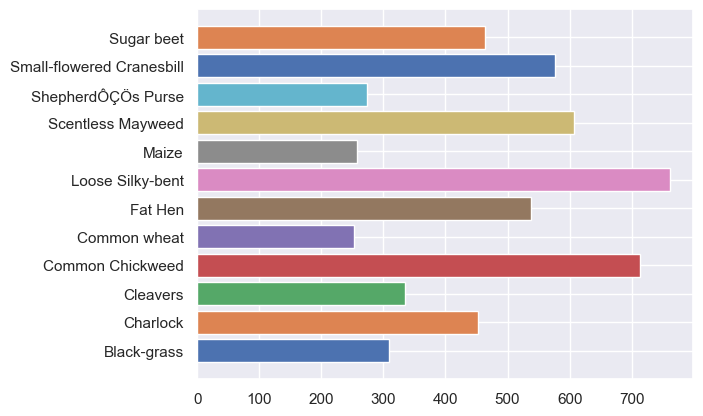

In [5]:
total_images =0
for folder in subfolders:
    total_images= len(listdir(Directory +"/" + folder))
    plt.barh(y=folder,width=total_images)

In [6]:
total_images = 0
for folder in subfolders:
    total_images += len(listdir(Directory+ "/" + folder))

In [7]:
def get_shape_of_object(obj):
  if obj is None:
    return None
  return obj.shape

In [8]:
plantstate = pd.DataFrame(index=np.arange(0, total_images), columns=["Largeur", "Hauteur","Nb_pixels", "Espèces"])

In [9]:
k = 0
all_images = []
for m in tqdm(range(len(subfolders))):
    folder = subfolders[m]
    
    images = listdir(Directory + "/" + folder)
    all_images.extend(images)
    n_images = len(images)
    for n in range(0, n_images):
        files = listdir(Directory + "/" + folder)
        image =np.array(Image.open(Directory + "/" + folder + "/" + files[n]))

        plantstate.loc[k, "Largeur"] =image.shape[0]
        plantstate.loc[k, "Hauteur"] = image.shape[1]
        plantstate.loc[k, "Nb_pixels"] =image.shape[0]*image.shape[1]*image.shape[2]
        plantstate.loc[k, "Espèces"] = folder
        plantstate.loc[k, "Nom_image"] = images[n]
        k+=1

  0%|          | 0/12 [00:00<?, ?it/s]

In [10]:
len(all_images)

5538

In [11]:
plantstate.head()

Largeur Hauteur Nb_pixels      Espèces Nom_image
0     138     138     57132  Black-grass     1.png
1    1040    1040   3244800  Black-grass    10.png
2      82      82     20172  Black-grass   100.png
3     156     156     73008  Black-grass   101.png
4     197     197    116427  Black-grass   102.png

In [12]:
data=plantstate[plantstate['Espèces']=="Black-grass"]

In [13]:
Table=plantstate.groupby(['Espèces']).agg({"Largeur":["min","mean","max","count"],
                                           "Hauteur":["min","mean","max","count"],
                                           "Nb_pixels":["min","mean","max","count"]})

In [14]:
Table

Largeur                         Hauteur              \
                              min        mean   max count     min        mean   
Espèces                                                                         
Black-grass                    73  597.346278  2670   309      73  601.504854   
Charlock                      121  409.940265  1582   452     121  409.944690   
Cleavers                       66  303.352239   866   335      66  303.352239   
Common Chickweed               54  236.568022   718   713      54  236.568022   
Common wheat                   51  419.557312  1432   253      51  419.561265   
Fat Hen                        55  299.312268  1273   538      55  299.312268   
Loose Silky-bent               71  370.185283  3457   761      71  370.943495   
Maize                          54  452.844358  1900   257      54  452.856031   
Scentless Mayweed              49  232.744646  1227   607      49  232.744646   
ShepherdÔÇÖs Purse             63  285.897810  1317   274      63  285.897810   
Small-flowered Cranesbill      62  331.458333  1006   576      62  331.458333   
Sugar beet                     49  537.542117  1715   463      49  538.514039   

                                      Nb_pixels                                
                            max count       min          mean       max count  
Espèces                                                                        
Black-grass                2840   309     15987  1.766677e+06  21386700   309  
Charlock                   1582   452     43923  7.280416e+05   7508172   452  
Cleavers                    866   335     13068  3.369466e+05   2249868   335  
Common Chickweed            718   713      8748  2.355304e+05   1546572   713  
Common wheat               1432   253      7803  7.775578e+05   6151872   253  
Fat Hen                    1273   538      9075  3.872673e+05   4861587   538  
Loose Silky-bent           3652   761     15123  8.155814e+05  37874892   761  
Maize                      1900   257      8748  1.079673e+06  10830000   257  
Scentless Mayweed          1227   607      7203  2.783160e+05   4516587   607  
ShepherdÔÇÖs Purse         1317   274     11907  4.012288e+05   5203467   274  
Small-flowered Cranesbill  1006   576     11532  4.297843e+05   3036108   576  
Sugar beet                 1715   463      7203  1.192229e+06   8823675   463

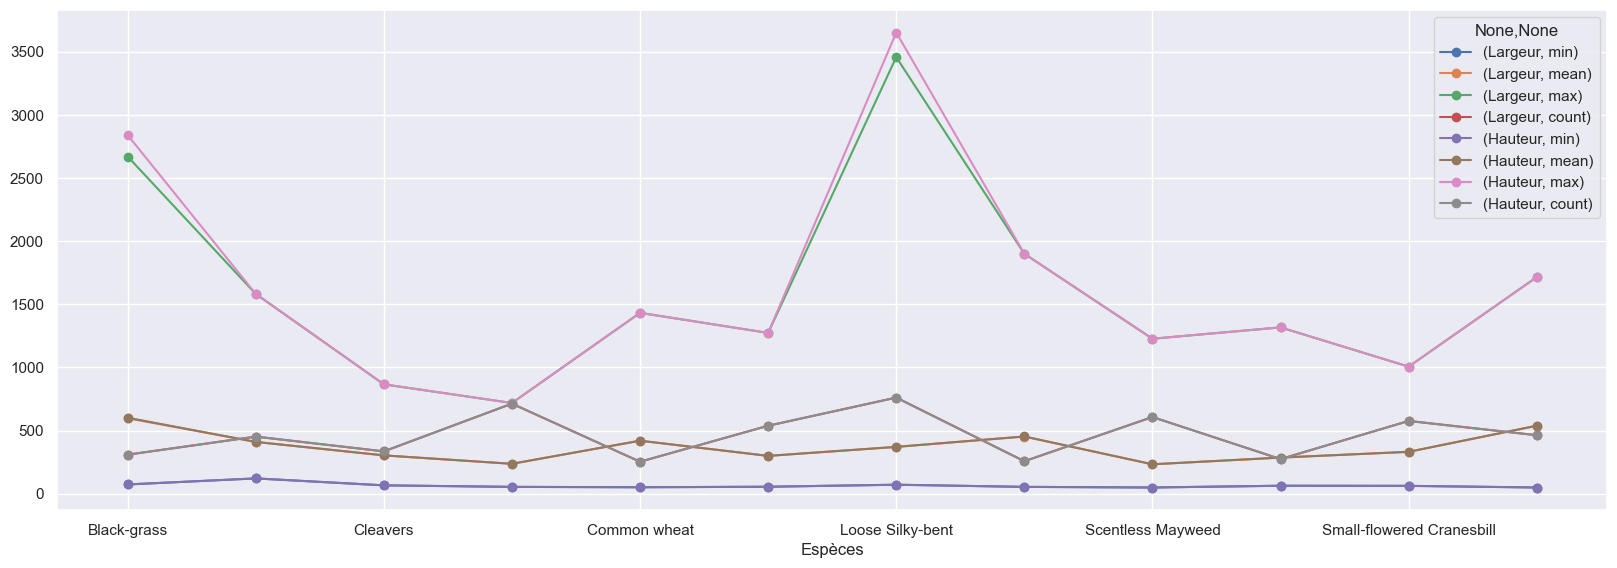

In [15]:
plantstate.groupby(['Espèces']).agg({"Largeur":["min","mean","max","count"],
                                     "Hauteur":["min","mean","max","count"]}).plot(figsize = (20, 6.5), style = 'o-');

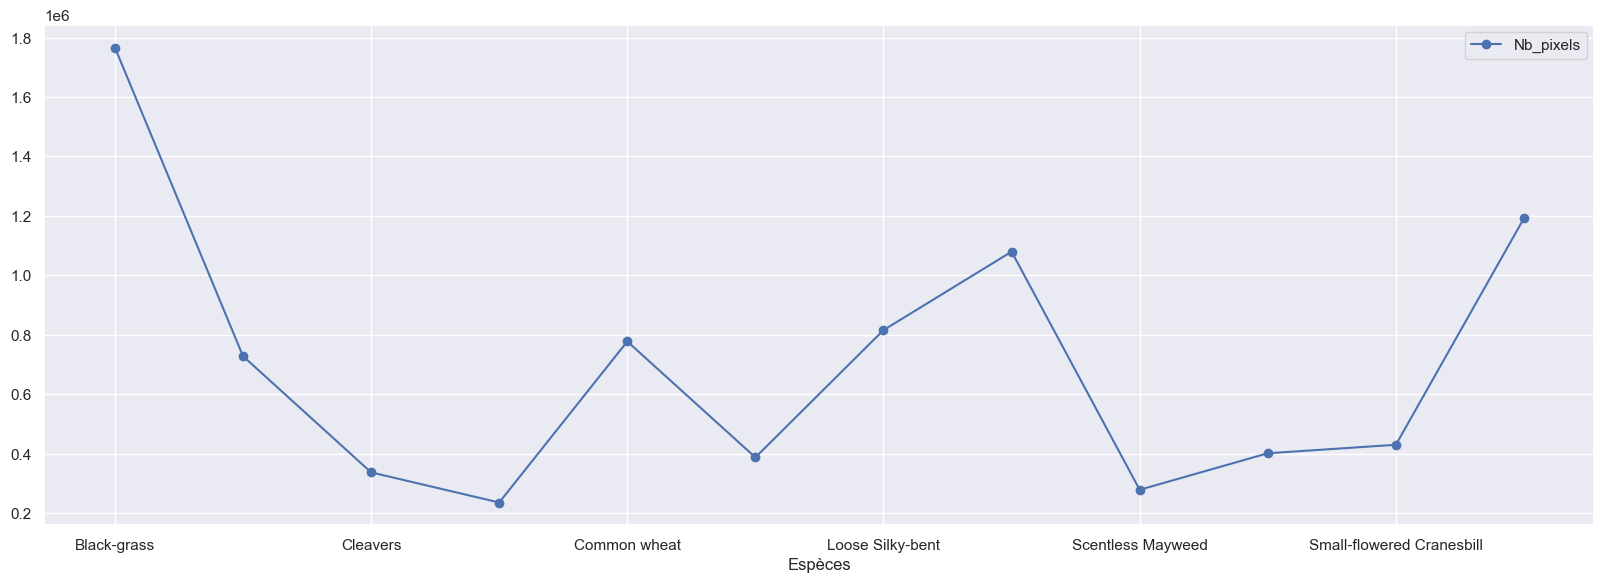

In [16]:
plantstate.groupby(['Espèces']).agg({"Nb_pixels":"mean"}).plot(figsize = (20, 6.5), style = 'o-');

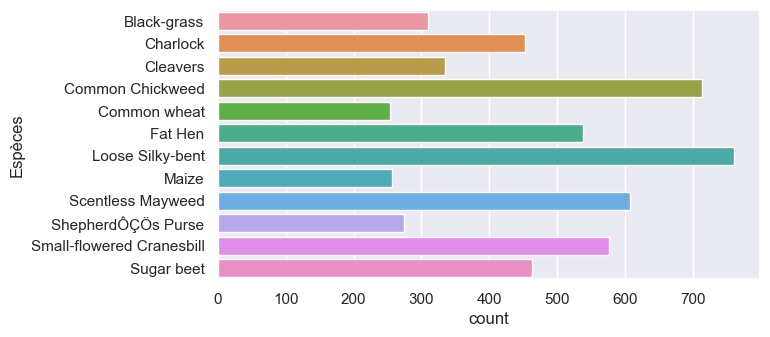

In [17]:
plt.figure(figsize=(7,3.5))
sns.countplot(y="Espèces",data=plantstate);

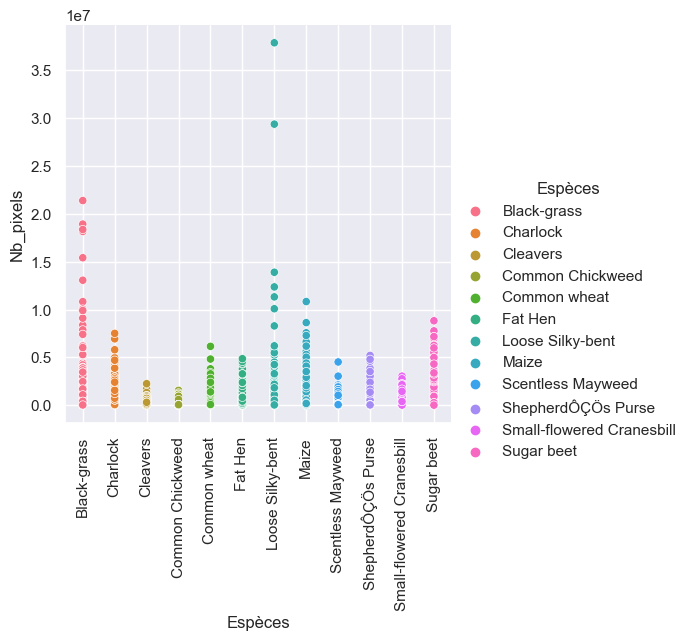

In [18]:
sns.relplot(x="Espèces",y='Nb_pixels',hue="Espèces",data=plantstate);
plt.xticks(rotation="vertical");

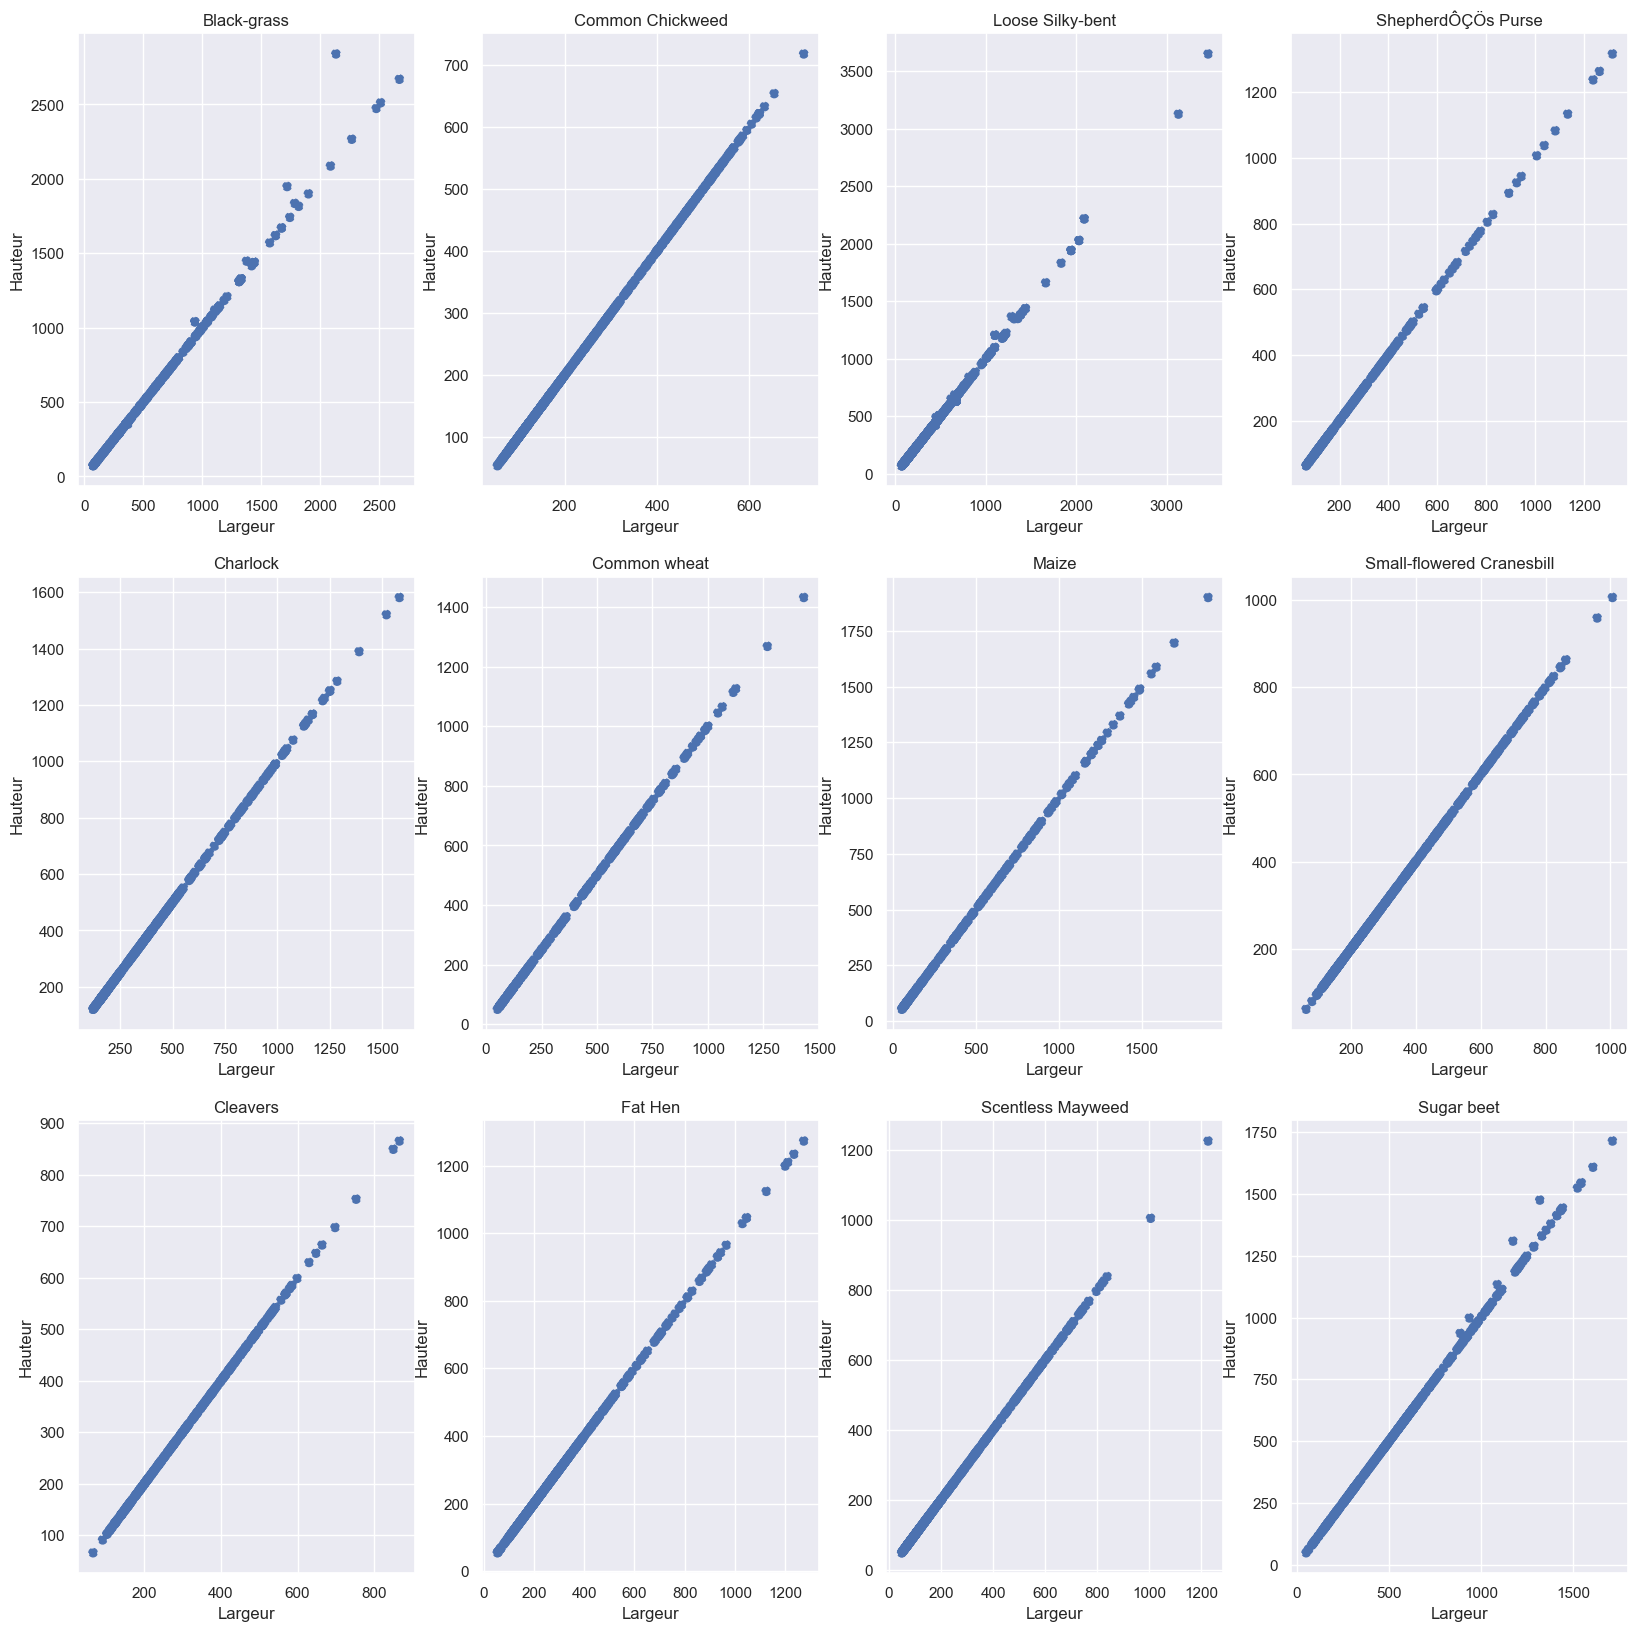

In [19]:
fig, ax = plt.subplots(3,4,figsize=(20,20))

for m in range(3):
    for n in range(4):
        folder = subfolders[m+n*3]
        data=plantstate[plantstate["Espèces"]==folder]
        ax[m,n].scatter('Largeur','Hauteur',linestyle='dashed',marker='o',data=data)
        ax[m,n].set_title(folder)
        ax[m,n].set_xlabel('Largeur')
        ax[m,n].set_ylabel('Hauteur')

In [20]:
"""fig, ax = plt.subplots(3,4,figsize=(20,20))
for m in range(3):
    for n in range(4):
        folder = subfolders[m+n*3]
        data=plantstate[plantstate["Espèces"]==folder]
        x = np.arange(1,len(data)+1)
        ax[m,n].bar(x,'Nb_pixels',data=data)
        ax[m,n].set_title(folder)
        ax[m,n].set_xlabel('Observations')
        ax[m,n].set_ylabel('Nombre de pixels') """

'fig, ax = plt.subplots(3,4,figsize=(20,20))\nfor m in range(3):\n    for n in range(4):\n        folder = subfolders[m+n*3]\n        data=plantstate[plantstate["Espèces"]==folder]\n        x = np.arange(1,len(data)+1)\n        ax[m,n].bar(x,\'Nb_pixels\',data=data)\n        ax[m,n].set_title(folder)\n        ax[m,n].set_xlabel(\'Observations\')\n        ax[m,n].set_ylabel(\'Nombre de pixels\') '

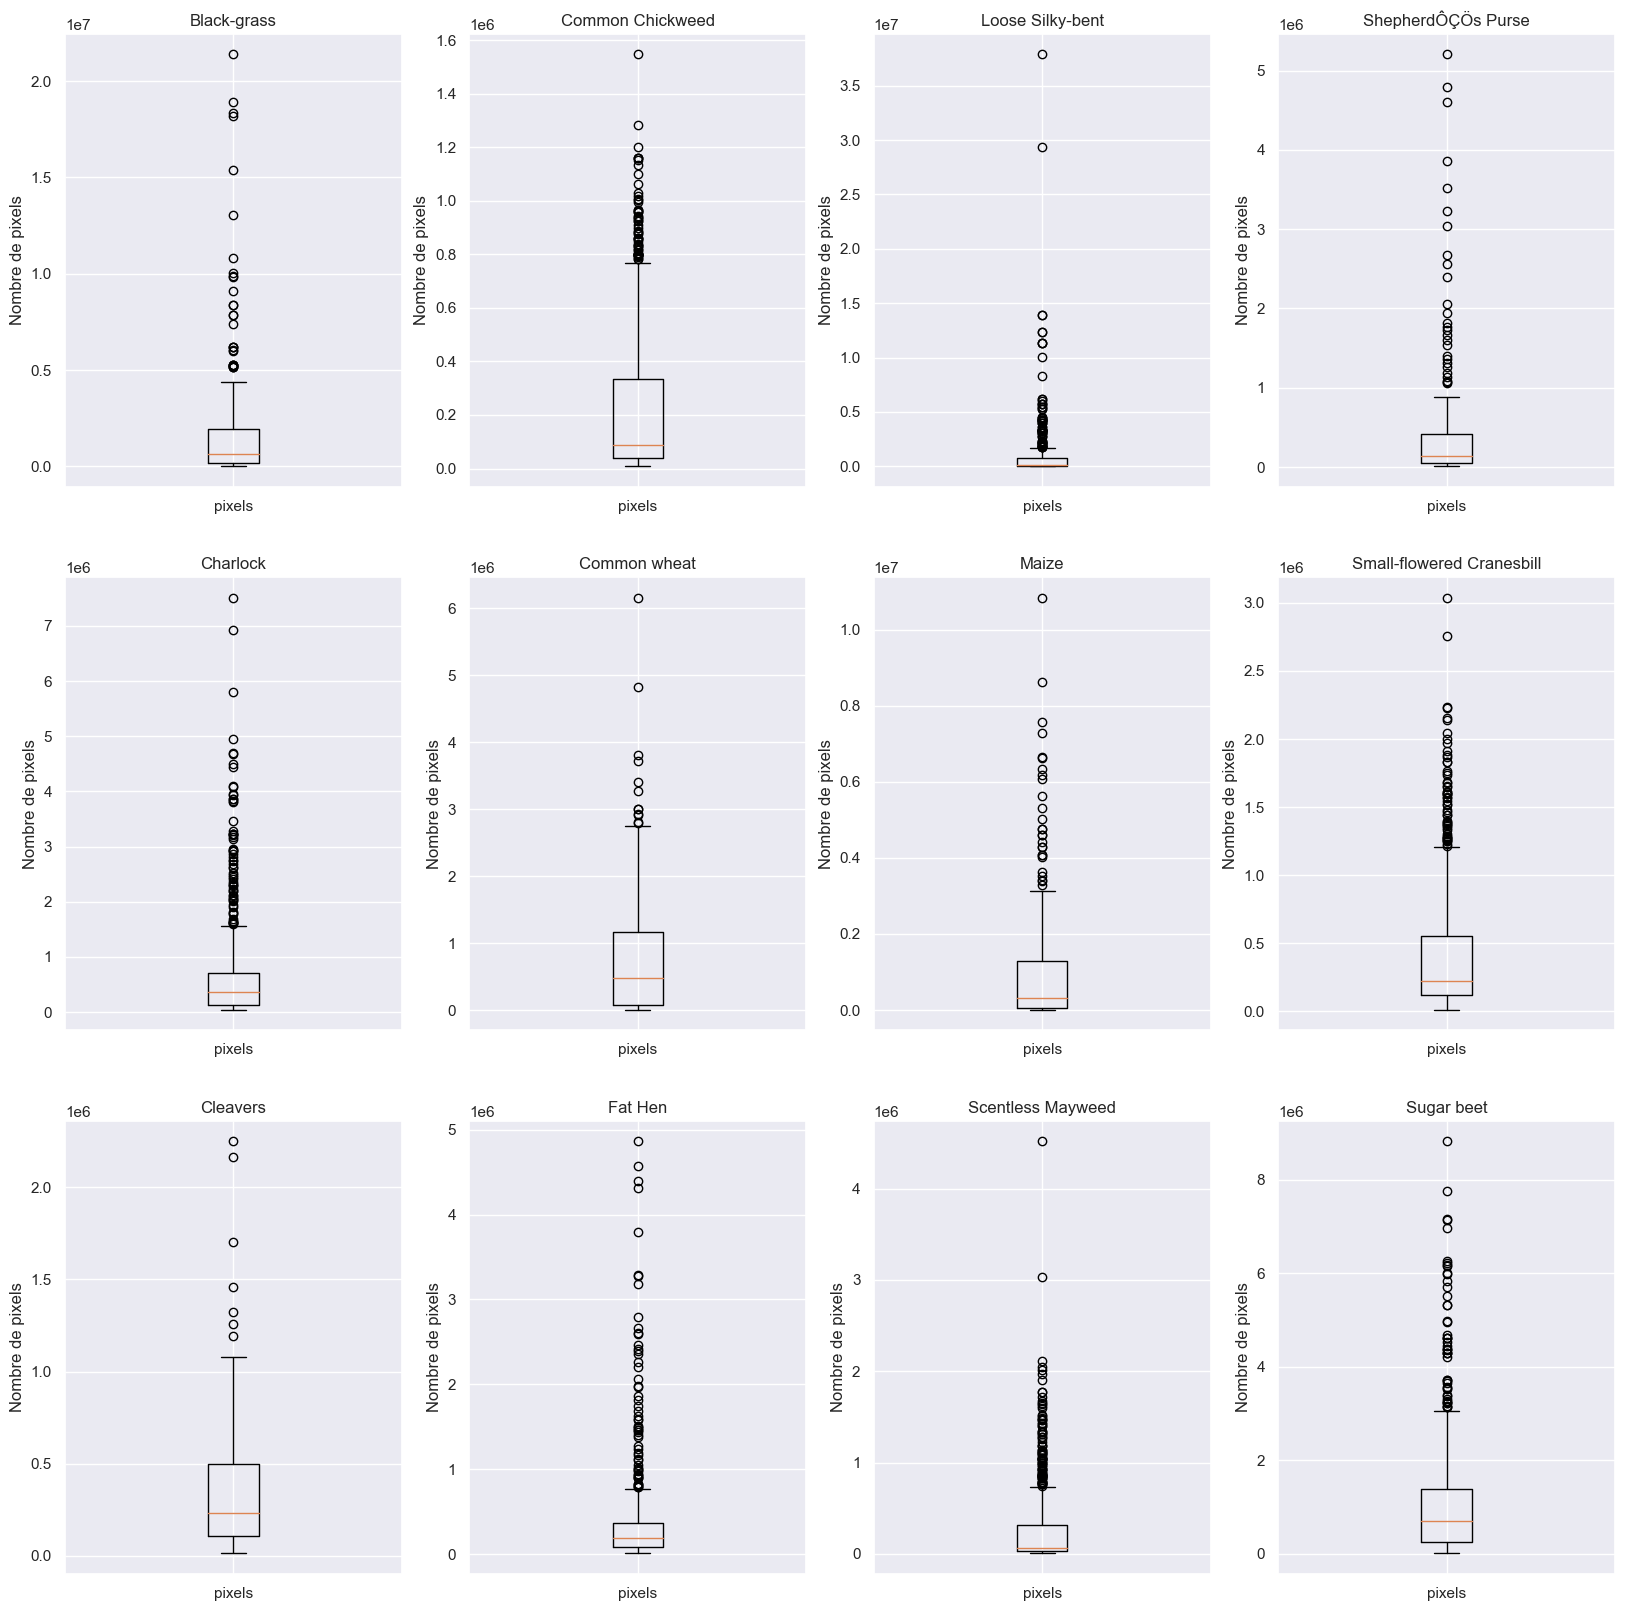

In [21]:
fig, ax = plt.subplots(3,4,figsize=(20,20))
for m in range(3):
    for n in range(4):
        folder = subfolders[m+n*3]
        data=plantstate[plantstate["Espèces"]==folder]
        x = np.arange(1,len(data)+1)
        ax[m,n].boxplot('Nb_pixels',data=data)
        ax[m,n].set_title(folder)
        ax[m,n].set_xticks([1],["pixels"])
        ax[m,n].set_ylabel('Nombre de pixels') 

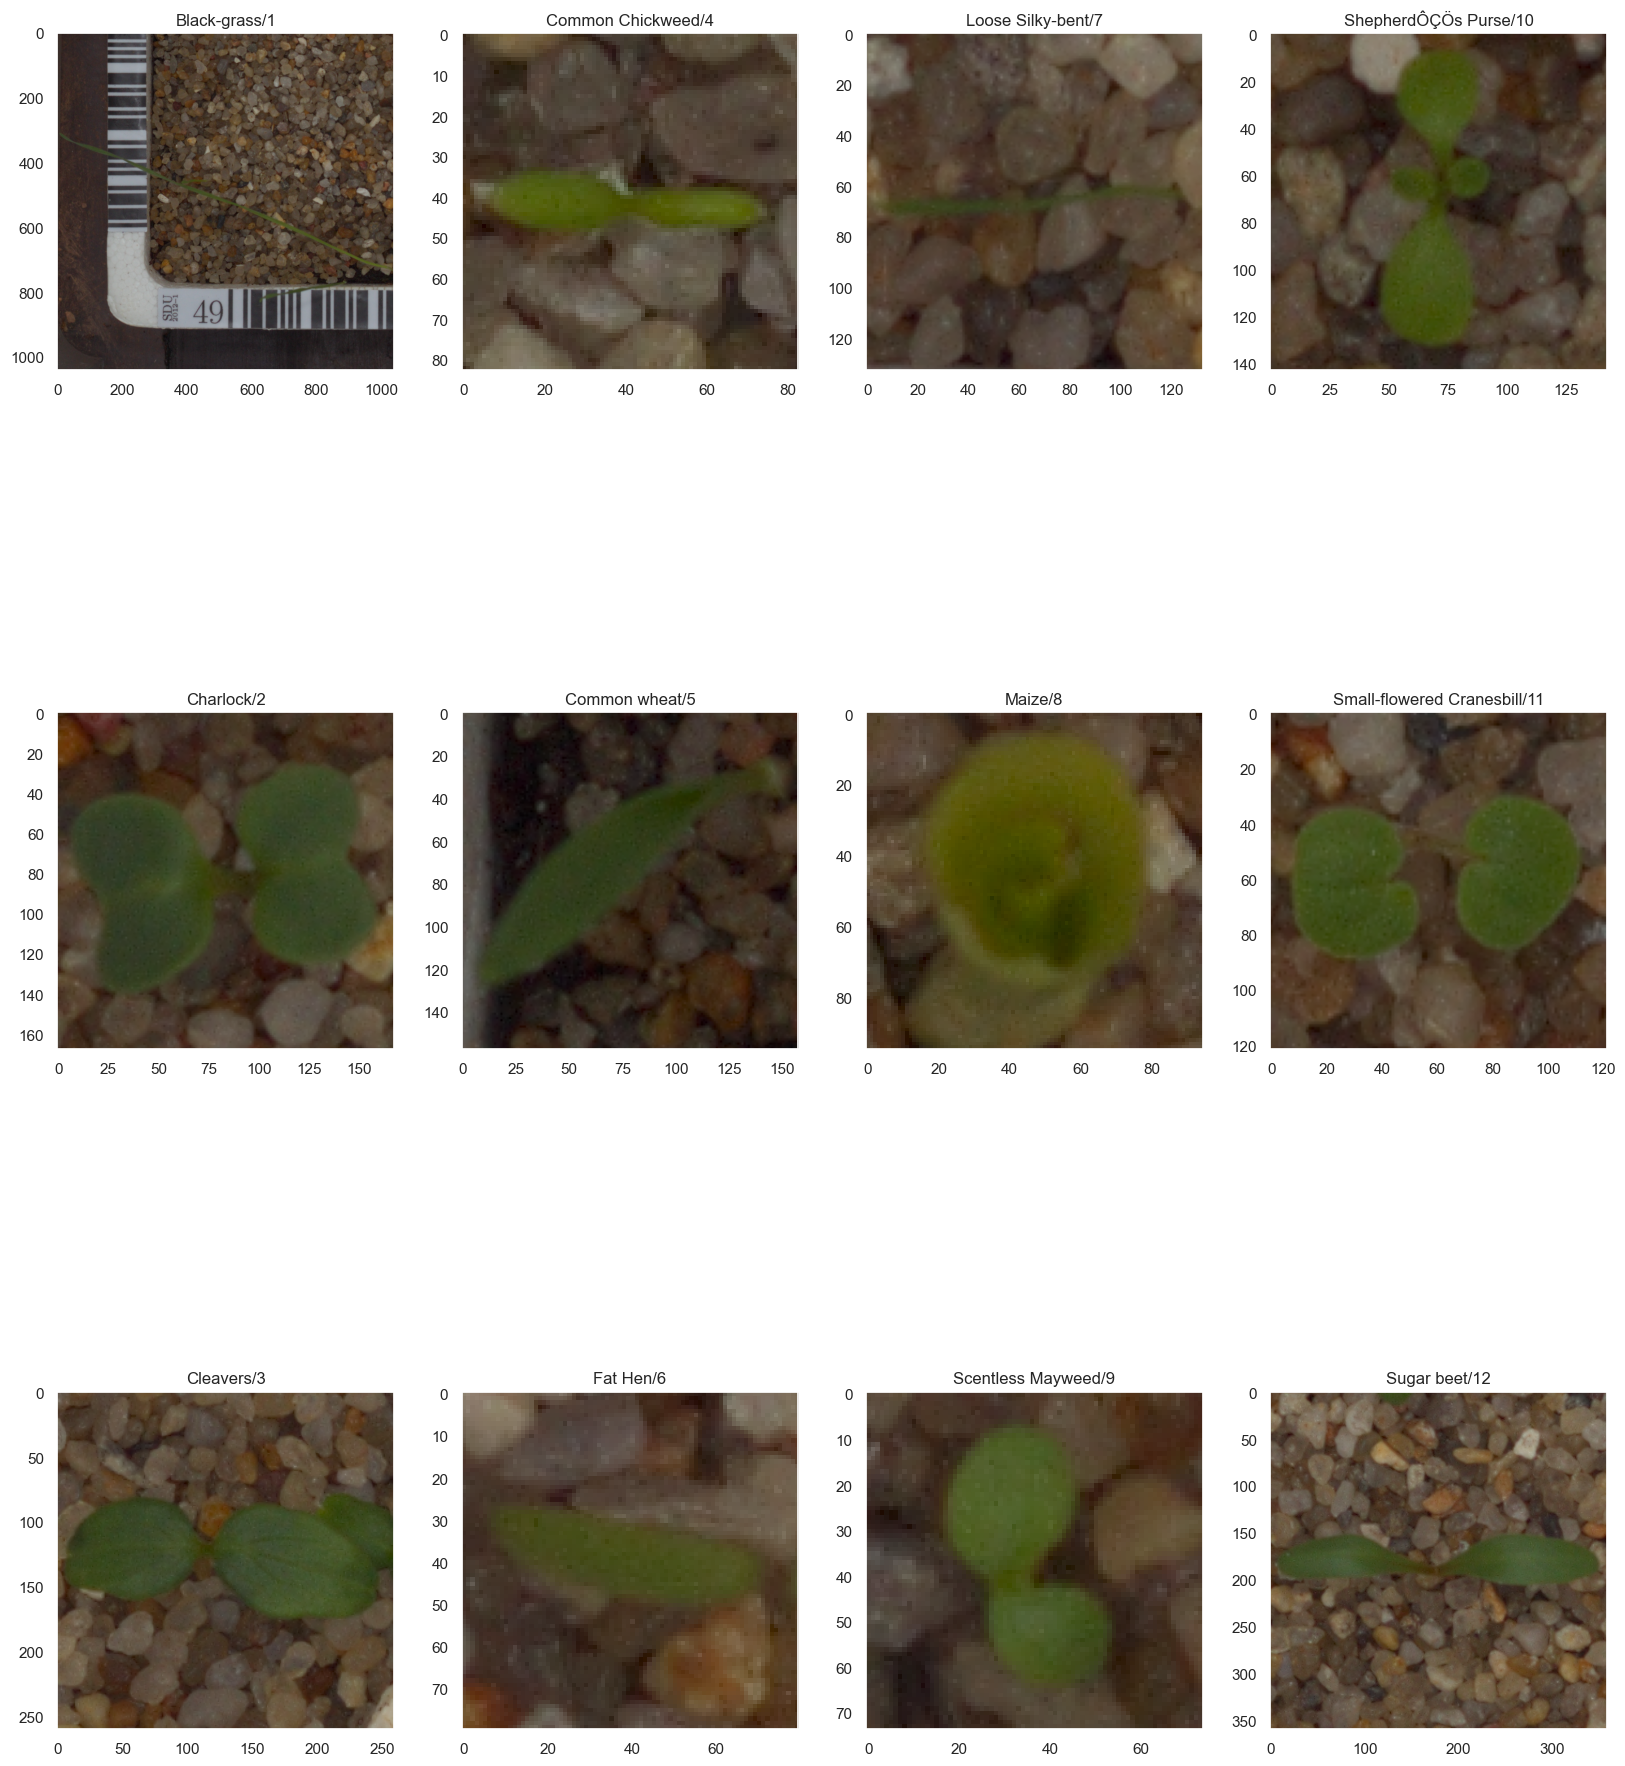

In [22]:
fig, ax = plt.subplots(3,4,figsize=(20,25))

for m in range(3):
    for n in range(4):
        folder = subfolders[m+n*3]
        files = listdir(Directory + "/" + folder)
        image =np.array(Image.open(Directory + "/" + folder + "/" + files[1]))
        
        ax[m,n].imshow(image)
        ax[m,n].grid(False)
        ax[m,n].set_title(folder + "/" + str(m+n*3+1))

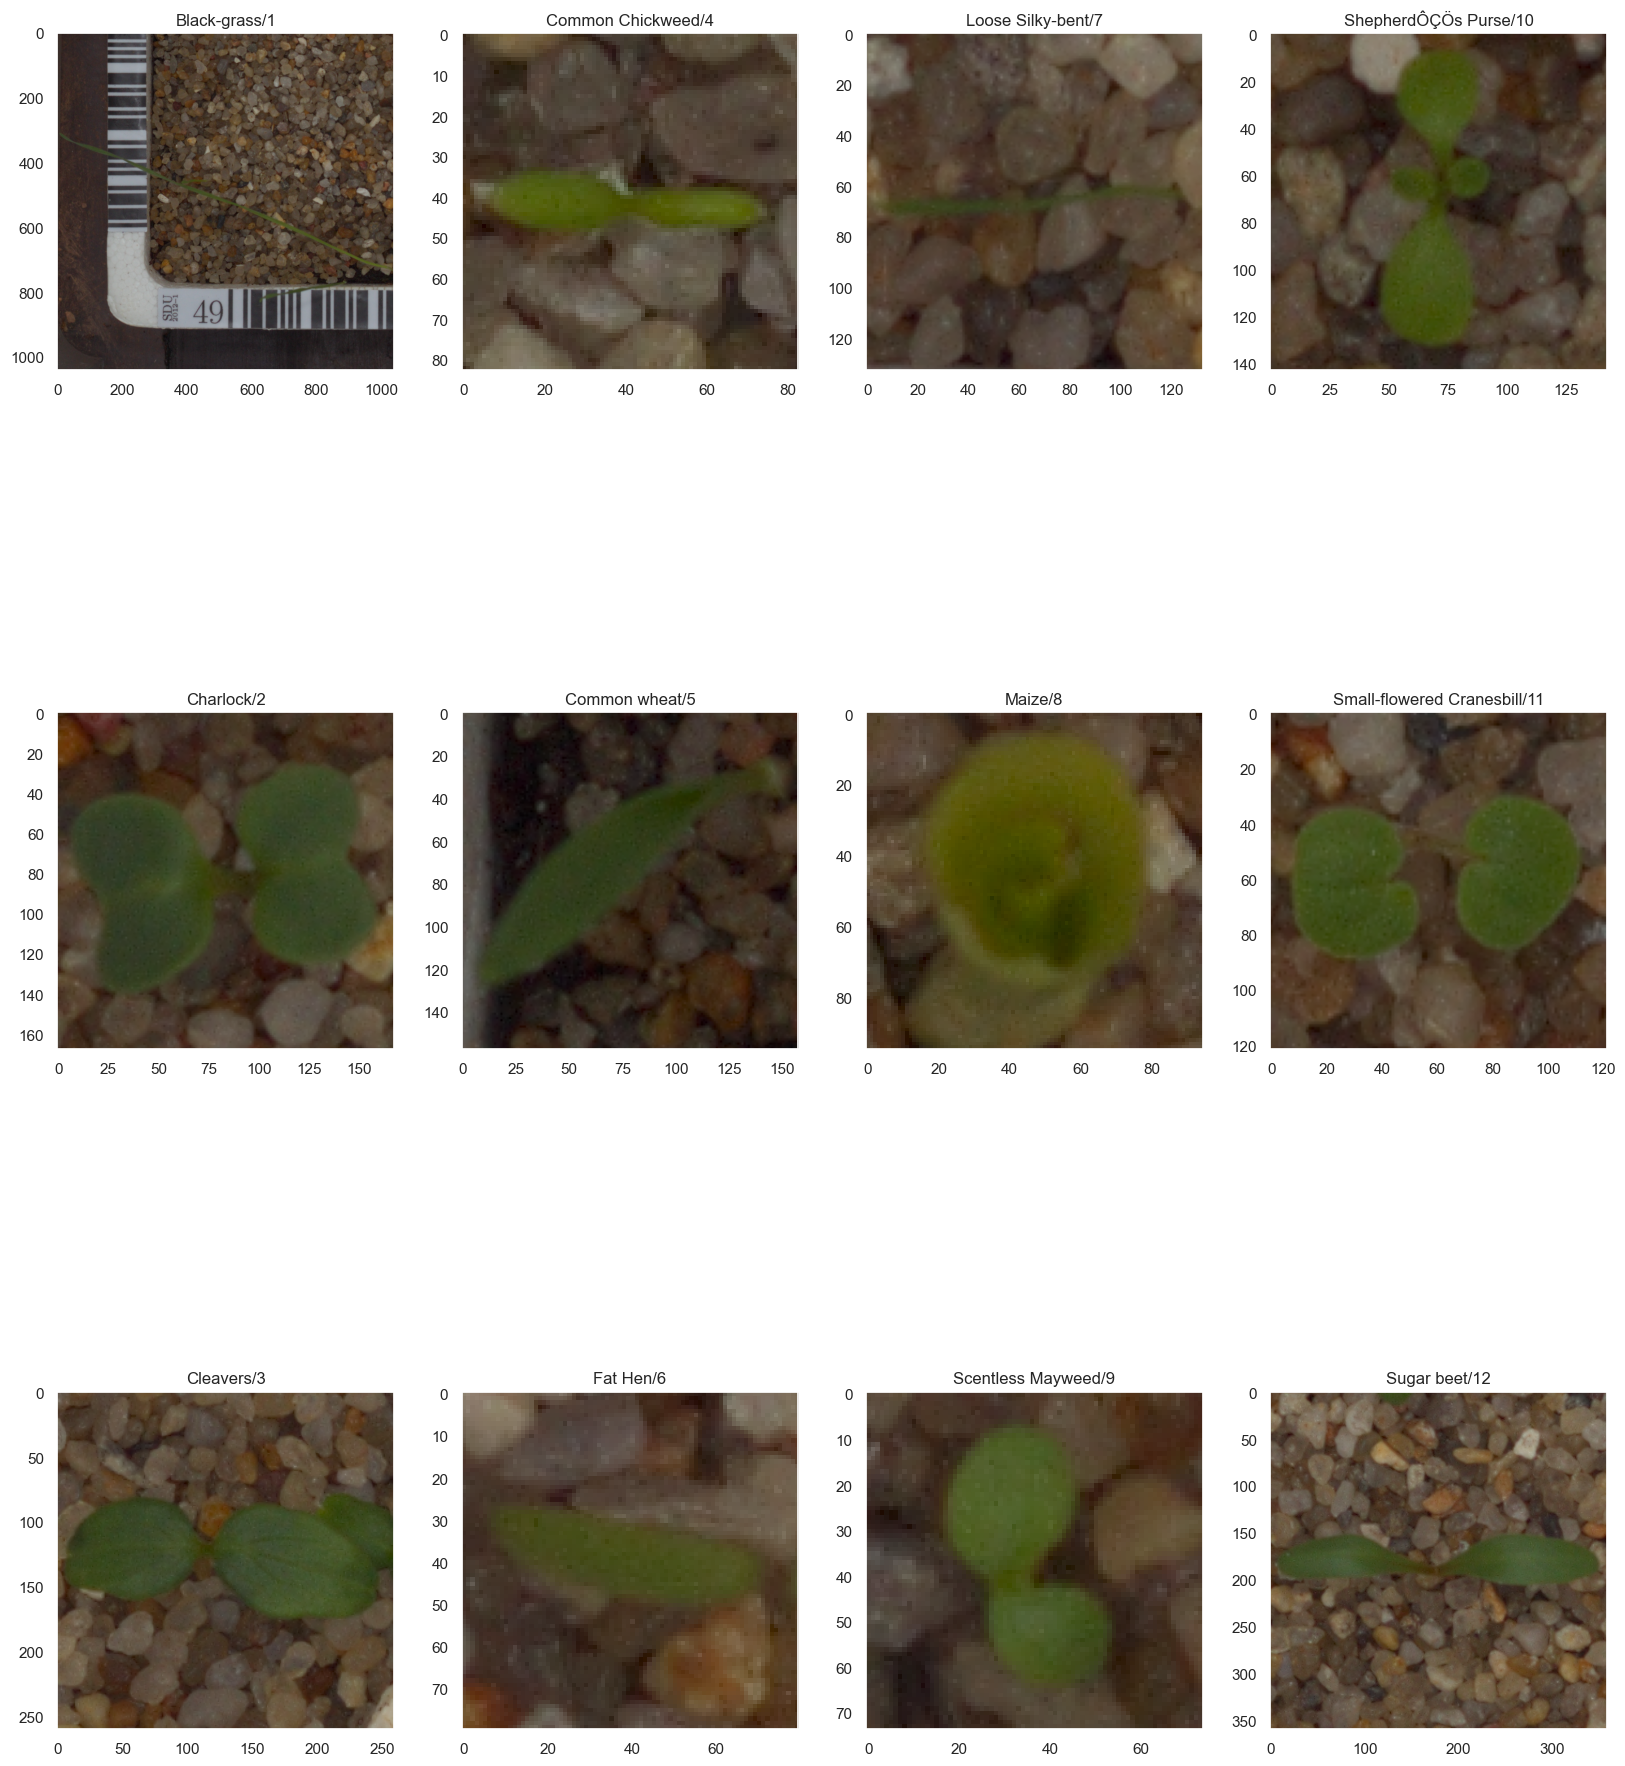

In [23]:
fig, ax = plt.subplots(3,4,figsize=(20,25))

for m in range(3):
    for n in range(4):
        folder = subfolders[m+n*3]
        files = listdir(Directory + "/" + folder)
        image =np.array(Image.open(Directory + "/" + folder + "/" + files[1]))
        ax[m,n].imshow(image)
        ax[m,n].grid(False)
        ax[m,n].set_title(folder + "/" + str(m+n*3+1))

In [24]:
subfolders[0]

'Black-grass'

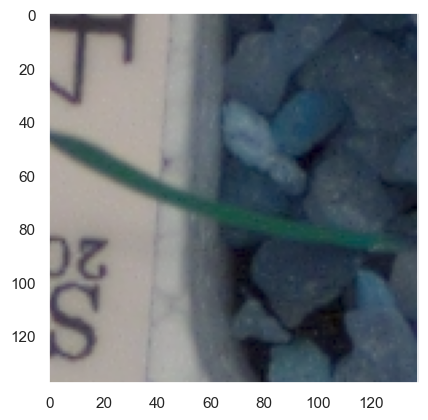

In [25]:
p1 = cv2.imread('nonsegmentedv2/Black-grass/1.png')
plt.grid(False)
plt.imshow(p1);

In [32]:
folder=subfolders[2]
folder

'Cleavers'

In [33]:
p1 =cv2.imread('nonsegmentedv2/Cleavers/1.png')

In [34]:
p=p1.flatten()
image1=pd.DataFrame(p)

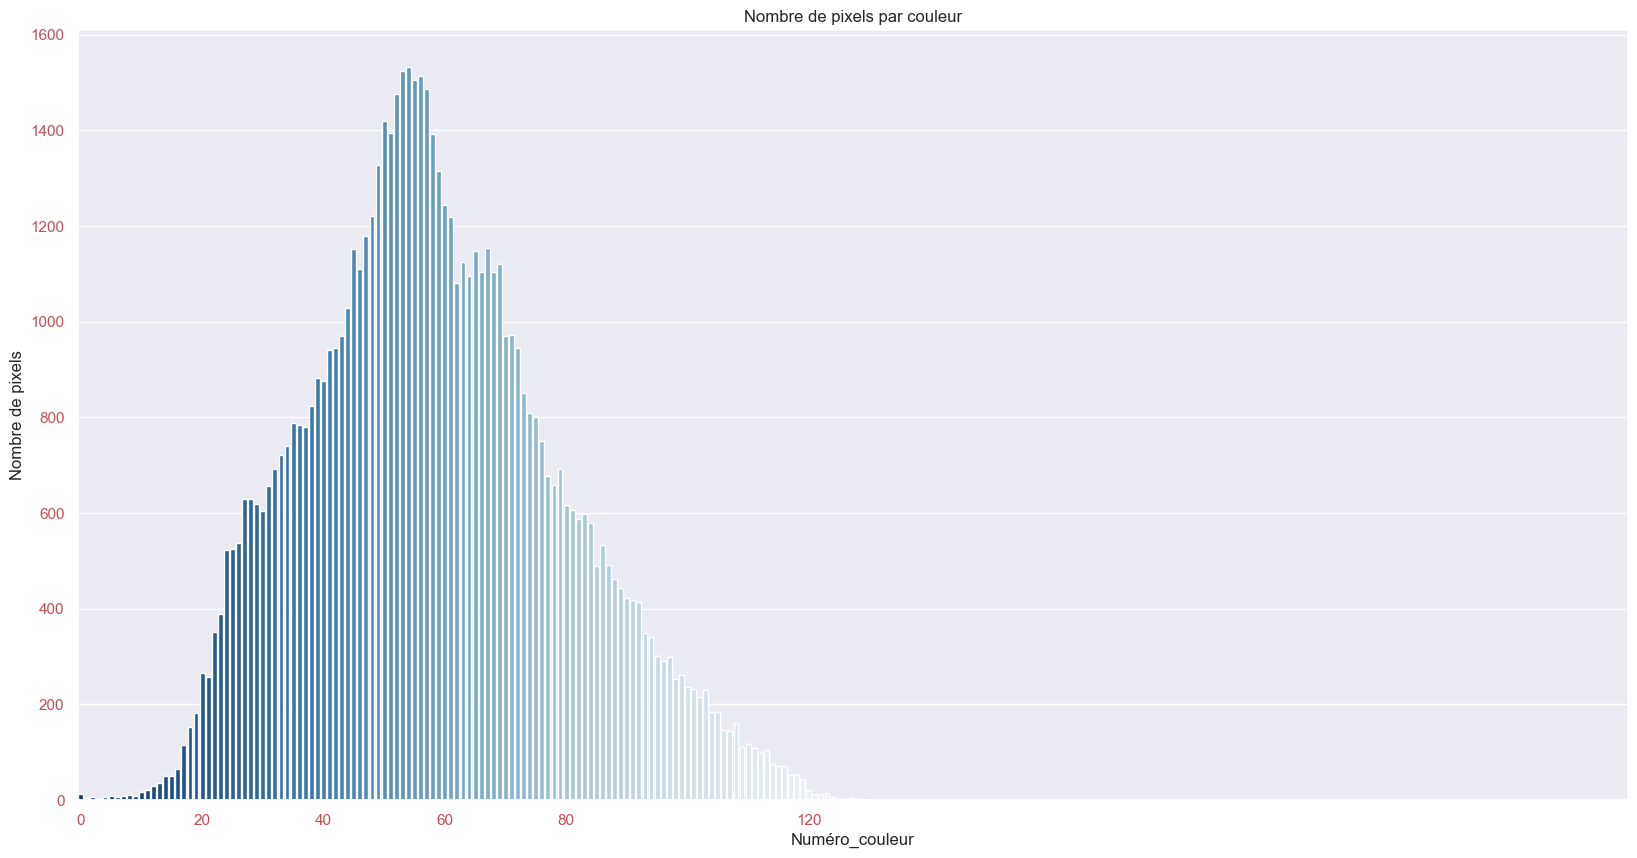

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x=image1[0], palette='Blues_r');
plt.xticks([0,20,40,60,80,120,150,180,210,255], color='r');
plt.yticks(color='r');
plt.title("Nombre de pixels par couleur");
plt.xlabel("Numéro_couleur");
#plt.grid(False)
plt.ylabel("Nombre de pixels");

In [37]:
# Il faut imaginer une image comme un tableau de pixels, chaque case contient donc une couleur.
# loadPixels()
# updatePixels()

In [38]:
folder=subfolders[3]
folder

'Common Chickweed'

In [39]:
image =cv2.imread('nonsegmentedv2/charlock/3.png')

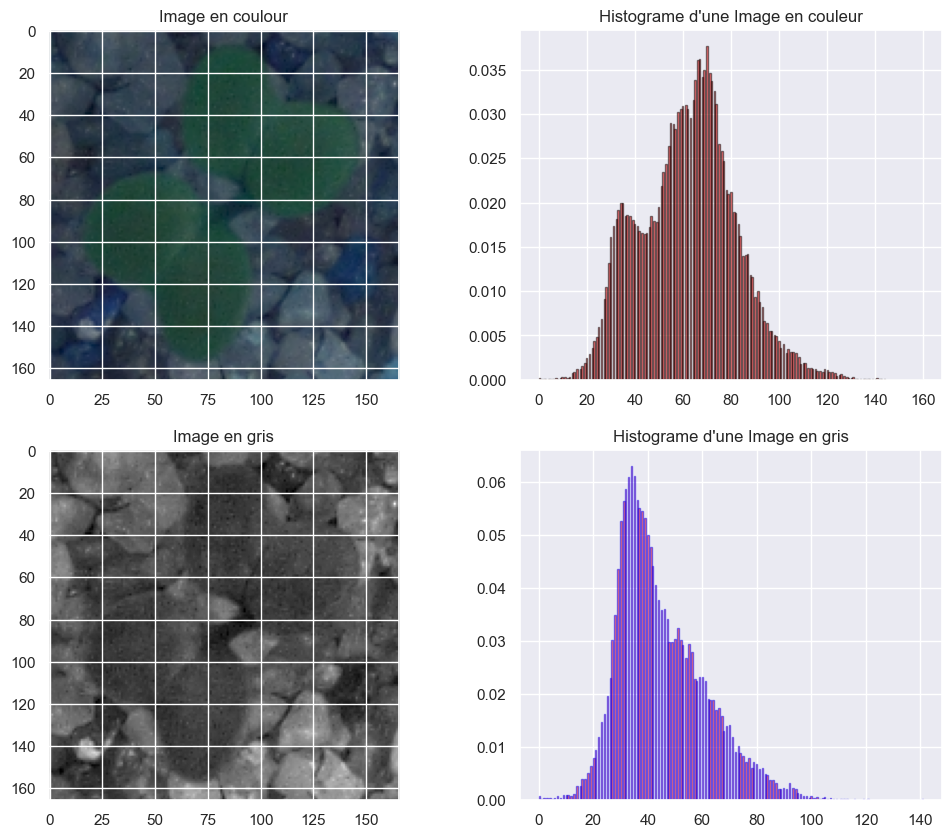

In [40]:
fig, ax = plt.subplots(2,2,figsize=(12,10))

plt.subplot(221)

plt.imshow(image);
plt.title("Image en coulour")
plt.subplot(222)

plt.hist(image.ravel(),bins=255, density=True , alpha=.5 , edgecolor='black', color='red');
plt.title("Histograme d'une Image en couleur")

plt.subplot(223)


image1=image[:,:,0]
plt.imshow(image1,cmap='gray');
plt.title("Image en gris")

plt.subplot(224)

plt.hist(image1.ravel(),bins=255, density=True , alpha=.5 , edgecolor='blue', color='red');
plt.title("Histograme d'une Image en gris")

plt.show()

In [41]:
# histogramme par classe sans le background

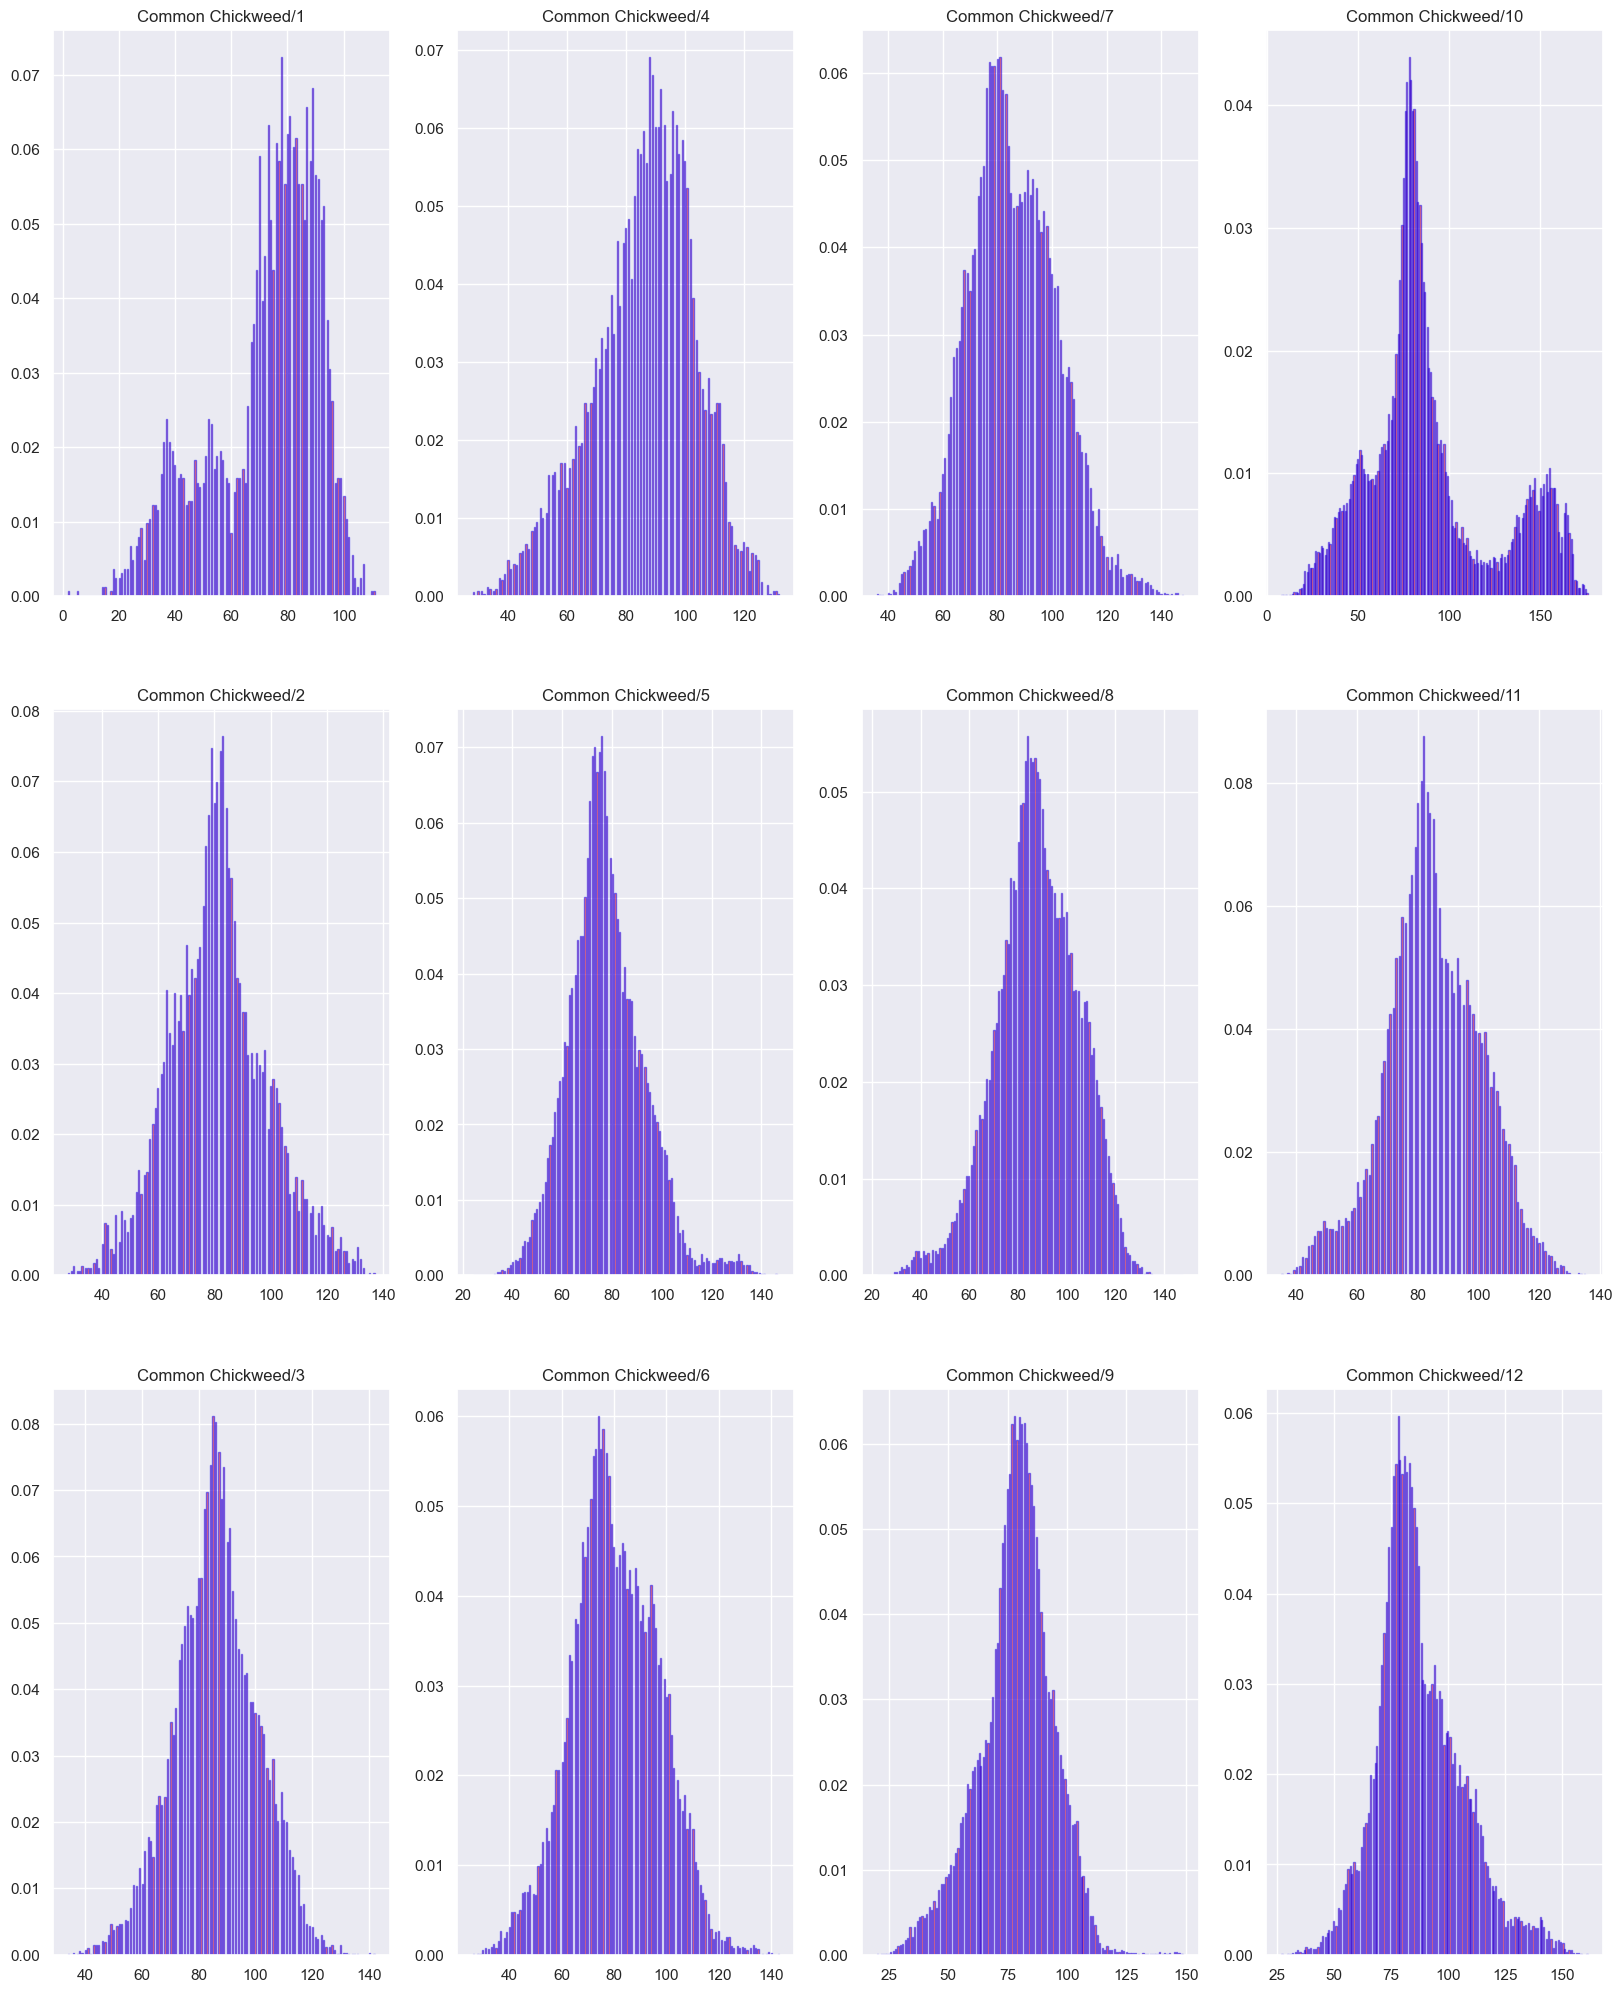

In [42]:
fig, ax = plt.subplots(3,4,figsize=(20,25))
classe=3
for m in range(3):
    for n in range(4):
        folder = subfolders[classe]
        files = listdir(Directory + "/" + folder)
        image =np.array(Image.open(Directory + "/" + folder + "/" + files[m+n*3]))
        
        image1=image[:,:,0]
        ax[m,n].hist(image1.ravel(),bins=255, density=True , alpha=.5 , edgecolor='blue', color='red')
        ax[m,n].set_title(folder + "/" + str(m+n*3+1))

In [43]:
# Histo moyen par classe 

In [44]:
from matplotlib.ticker import PercentFormatter

  0%|          | 0/3 [00:00<?, ?it/s]

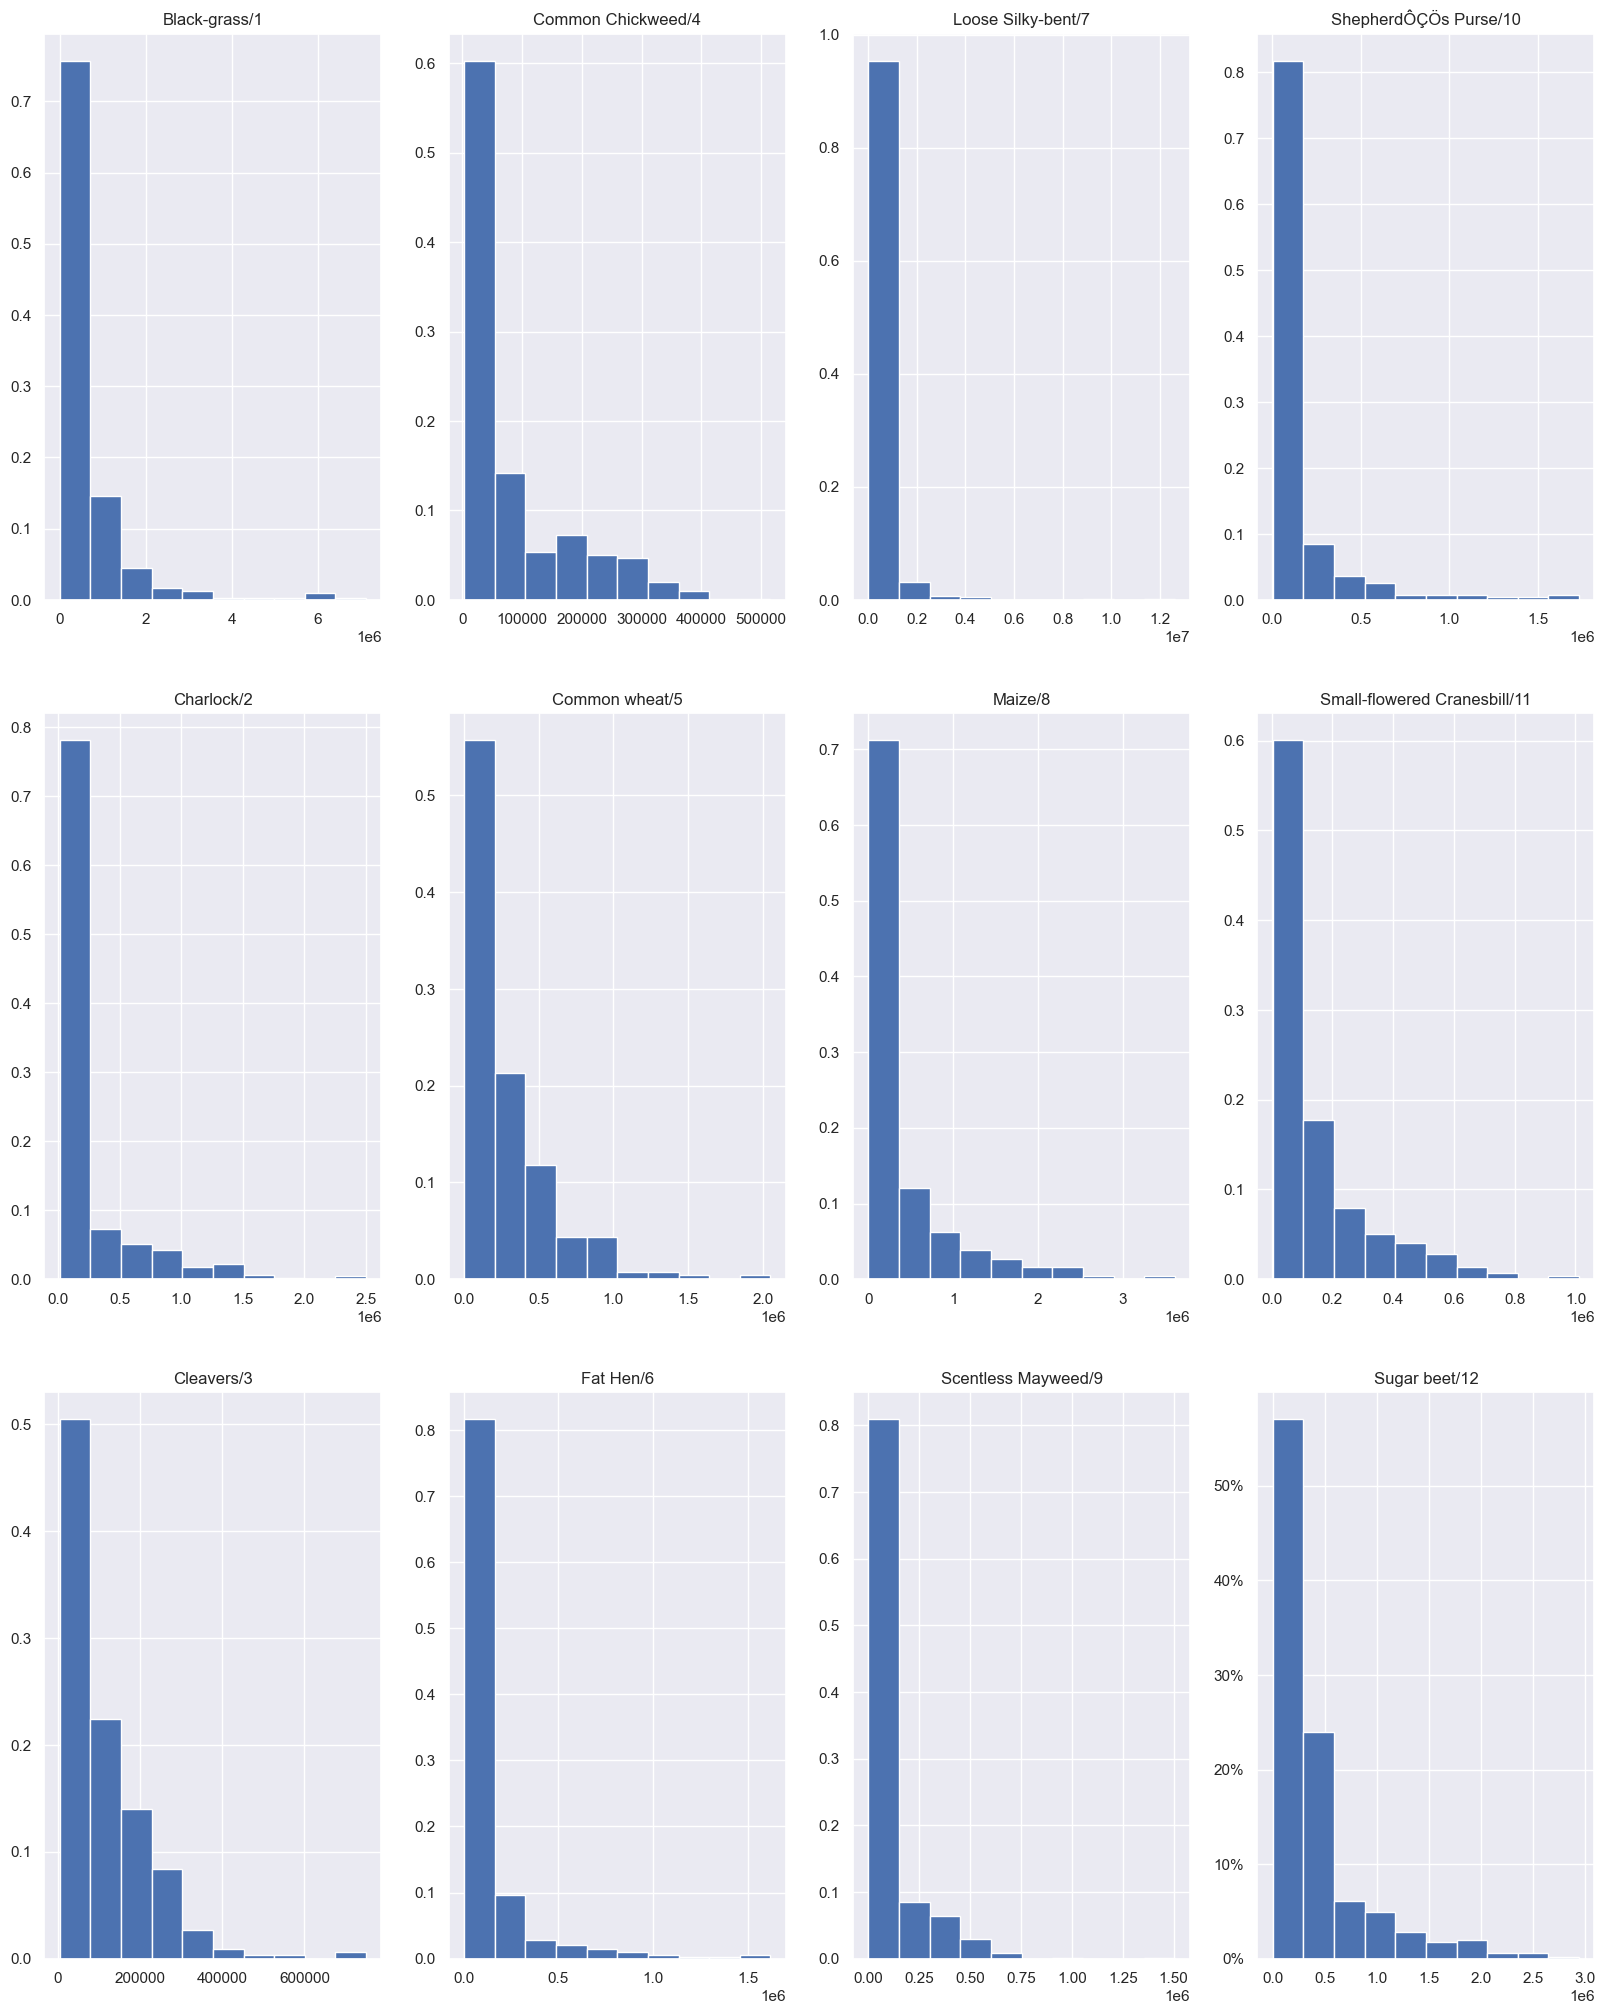

In [45]:
k = 0
all_images = []
fig, ax = plt.subplots(3,4,figsize=(20,25))
for t in tqdm(range(3)):
    for k in range(4):
        folder = subfolders[t+k*3]

        images = listdir(Directory + "/" + folder)
        n_images = len(images)

        Tb = pd.DataFrame(index=np.arange(0,n_images), columns=["Nb_pixels", "Espèces"])

        for n in range(0, n_images):
            files = listdir(Directory + "/" + folder)
            image =np.array(Image.open(Directory + "/" + folder + "/" + files[n]))

            Tb.loc[n, "Nb_pixels"] =image.shape[0]*image.shape[1]
            Tb.loc[n, "Espèces"] = folder
            Tb.loc[n, "Nom_image"] = images[n]
        ax[t,k].hist(Tb.Nb_pixels,weights=np.ones(len(Tb.Nb_pixels)) / len(Tb.Nb_pixels));
        ax[t,k].set_title(folder + "/" + str(t+k*3+1));
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1));

In [46]:
folder=subfolders[3]
folder

'Common Chickweed'

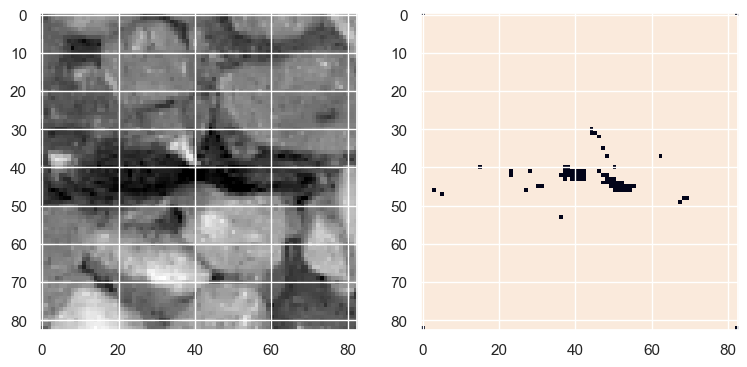

In [47]:
image =cv2.imread('nonsegmentedv2/Common Chickweed/10.png')
image1=image[:,:,0]
fig, ax = plt.subplots(1,1,figsize=(9,8))
plt.subplot(121)
plt.imshow(image1,cmap='gray');
plt.subplot(122)
open_x=ndimage.binary_opening(image1)
plt.imshow(open_x);